In [19]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt

import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC,SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [59]:
df=pd.read_csv('value.csv')
df=df.drop(columns=['Unnamed: 0'])
df_date=df['Date']
df=df.drop(columns=['Date'])
df

,Volume,forward_kr,nasdak,sp
0,202909,1194.800049,2006.680054,1108.479980
1,137026,1195.800049,2047.359985,1122.219971
2,116504,1178.900024,2057.370117,1123.670044
3,194191,1189.400024,2077.679932,1126.329956
4,139545,1176.800049,2100.250000,1131.920044
...,...,...,...,...
4580,1575905,1260.469971,11718.120117,4090.459961
4581,1412939,1264.550049,11891.790039,4137.290039
4582,1308899,1266.869995,11960.150391,4136.129883
4583,745937,1272.939941,12070.589844,4147.600098


In [60]:
df=df.drop(columns=['forward_kr'])
df

,Volume,nasdak,sp
0,202909,2006.680054,1108.479980
1,137026,2047.359985,1122.219971
2,116504,2057.370117,1123.670044
3,194191,2077.679932,1126.329956
4,139545,2100.250000,1131.920044
...,...,...,...
4580,1575905,11718.120117,4090.459961
4581,1412939,11891.790039,4137.290039
4582,1308899,11960.150391,4136.129883
4583,745937,12070.589844,4147.600098


In [61]:
scaler = MinMaxScaler()
scaler.fit(df[['Volume']])
df[['Volume']]=scaler.transform(df[['Volume']])
scaler.fit(df[['nasdak']])
df[['nasdak']]=scaler.transform(df[['nasdak']])
scaler.fit(df[['sp']])
df[['sp']]=scaler.transform(df[['sp']])
df['sp']

0       0.104841
1       0.108176
2       0.108528
3       0.109174
4       0.110531
          ...   
4580    0.828618
4581    0.839984
4582    0.839703
4583    0.842487
4584    0.828606
Name: sp, Length: 4585, dtype: float64

In [62]:
df

,Volume,nasdak,sp
0,0.030584,0.049905,0.104841
1,0.020654,0.052656,0.108176
2,0.017561,0.053333,0.108528
3,0.029270,0.054706,0.109174
4,0.021034,0.056232,0.110531
...,...,...,...
4580,0.237536,0.706581,0.828618
4581,0.212972,0.718324,0.839984
4582,0.197290,0.722946,0.839703
4583,0.112435,0.730414,0.842487


In [63]:
target=pd.read_csv('target_v.csv')
target=target.drop(columns=['Unnamed: 0','Date'])
target

,Change
0,-0.002066
1,0.002070
2,0.002204
3,-0.010719
4,-0.021114
...,...
4580,0.000000
4581,-0.030435
4582,0.004484
4583,-0.037946


In [64]:
for i in range(4585):
    if target['Change'][i]>0.05:
        target['Change'][i]=1
    elif target['Change'][i]<=0.05 and target['Change'][i]>=0:
        target['Change'][i]=0
        
    elif target['Change'][i]<0:
        target['Change'][i]=-1
        
        

In [65]:
target

,Change
0,-1.0
1,0.0
2,0.0
3,-1.0
4,-1.0
...,...
4580,0.0
4581,-1.0
4582,0.0
4583,-1.0


In [66]:
X_train=df[:3000]
#X_train=np.array(X_train)
print(X_train.shape)
y_train= target[:3000]
y_train
print(y_train.shape)
X_test=df[3001:]
y_test=target[3001:]
y_test.describe()

(3000, 3)
(3000, 1)


,Change
count,1584.000000
mean,-0.458965
std,0.546818
min,-1.000000
25%,-1.000000
50%,0.000000
75%,0.000000
max,1.000000


In [67]:
pd.isna(X_train).sum()

Volume    0
nasdak    0
sp        0
dtype: int64

In [68]:
svr=SVC(kernel='poly').fit(X_train,np.array(y_train).ravel())
pred=svr.predict(X_test)
pred.sum()

-2.0

In [69]:
svr.score(X_test,y_test)

0.49053030303030304

In [70]:
mean_squared_error(pred, y_test)

0.509469696969697

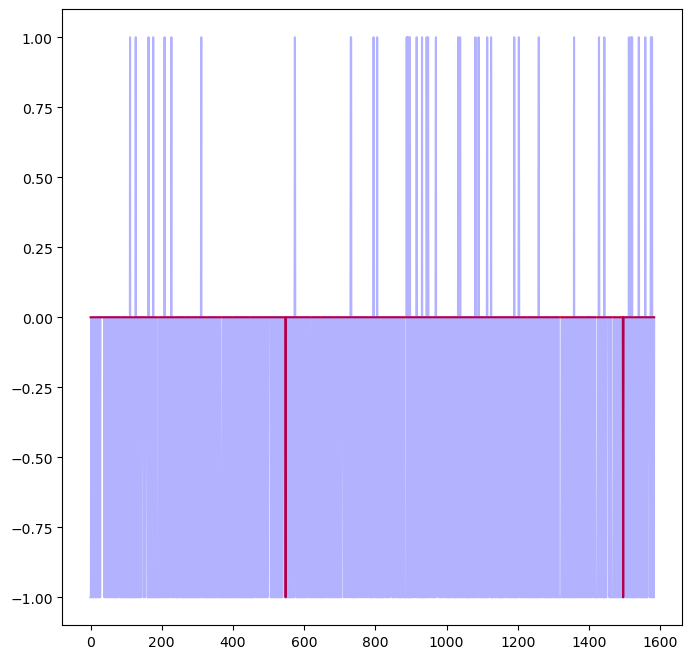

In [71]:
plt.figure(figsize=(8,8))
plt.plot(np.array(pred),'r')
plt.plot(np.array(y_test),'b',alpha=0.3)
plt.show()

In [41]:
data = df 
esn = ESN(n_inputs = 4,
          n_outputs = 1,
          n_reservoir = 500,
          spectral_radius = 1.5,
          random_state=42)


pred_training = esn.fit(X_train,y_train)

InvalidIndexError: (1, slice(None, None, None))